<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h>Unsupervised Analysis Project - Rachana Garad</h>

<h>DAT-5329 | Introduction to Machine Learning & AI</h>
Chase Kusterer - Faculty of Analytics<br>
Hult International Business School<br><br><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

# introduction 

The marketing landscape is evolving rapidly with the advent of social media, and within this space, video content, especially live streaming, has emerged as a critical player.This study explores the effects of video content with a particular focus on Facebook Live sellers in Thailand, a market that has shown a high level of interest in live streaming as a social commerce platform. The dataset used for this analysis consists of 7,050 Facebook posts from Thai retail sellers of clothing and cosmetics between March 2012 and June 2018. The posts come in a variety of formats, including text, deferred videos, live videos, and images. This extensive dataset was gathered through the Facebook API and offers a distinctive perspective for analyzing the subtleties of consumer interaction and Facebook Live's revolutionary impact on retailers' digital marketing strategies. By analyzing engagement metrics such as shares, comments, and emoji reactions, this study aims to offer insights into the evolving preferences and behaviors of social media users in Thailand, reinforcing the hypothesis that video content, particularly live streaming, holds substantial potential for enhancing customer engagement and interaction in the social commerce landscape.

<h2>Part I: Preparation</h2><br>
Run the following code to import necessary packages, load data, and set display options for pandas. 

In [682]:
########################################
# importing packages
########################################
import numpy             as np                   # mathematical essentials
import pandas            as pd                   # data science essentials
import matplotlib.pyplot as plt                  # fundamental data visualization
import seaborn           as sns                  # enhanced visualization
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA            # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans              # k-means clustering
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split        # train-test split

########################################
# loading data and setting display options
########################################
# loading data
df = pd.read_excel(io = './datasets/facebook_live_data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

User-Defined Functions 

In [683]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df
# standard_scaler
def standard_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler(copy = True)


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = list(df.columns)
    
    return new_df





<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h1>Part II - Data Preprocessing</h1>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Base modeling</h2>

In [684]:
# Extracting date, month, year, and time from the 'time_published' column
df['day'] = df['time_published'].dt.day
df['month'] = df['time_published'].dt.month
df['year'] = df['time_published'].dt.year
df['hour'] = df['time_published'].dt.hour

# Displaying the first few rows to confirm the extraction
df[['time_published', 'day', 'month', 'year', 'hour']].head()




,time_published,day,month,year,hour
0,2018-04-22 06:00:00,22,4,2018,6
1,2018-04-18 03:22:00,18,4,2018,3
2,2018-04-18 00:24:00,18,4,2018,0
3,2018-04-11 04:53:00,11,4,2018,4
4,2018-04-09 02:06:00,9,4,2018,2


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h1>Part III - Exploratory Data Analysis</h1>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [685]:
#checking the null value 
df.isnull().sum()

status_id         0
status_type       0
time_published    0
num_comments      0
num_shares        0
num_likes         0
num_loves         0
num_wows          0
num_hahas         0
num_sads          0
num_angrys        0
day               0
month             0
year              0
hour              0
dtype: int64

Dataset does not contain any null value 

C:\Users\racha\AppData\Local\Temp\ipykernel_3104\2293172334.py:20: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 4, count)
C:\Users\racha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\racha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\racha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

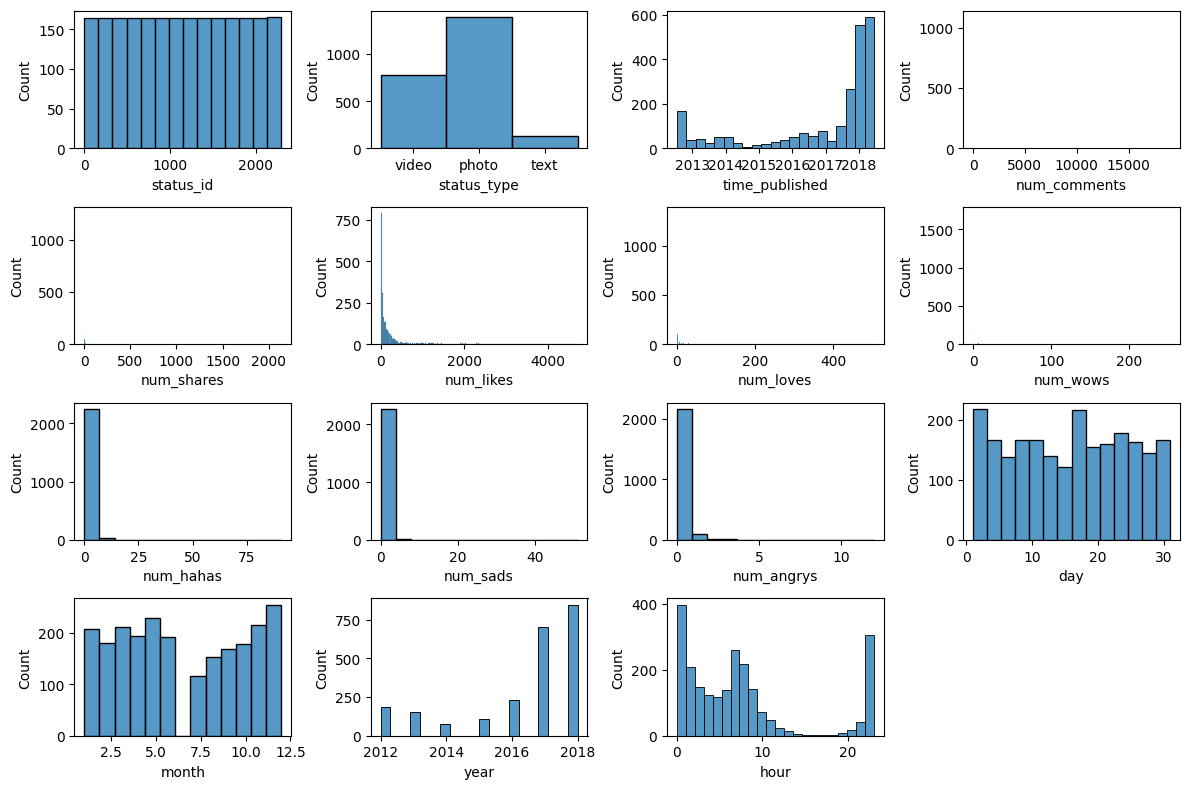

In [686]:
# setting figure size
fig, ax = plt.subplots(figsize = (12, 8))


# initializing a counter
count = 0


# looping to create visualizations
for col in df:

    # condition to break
    if count == 17:
        break
    
    # increasing count
    count += 1
    
    # preparing histograms
    plt.subplot(4, 4, count)
    sns.histplot(x = df[col],)


# formatting, saving, and displaying the plot
plt.tight_layout()
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
The distribution of several attributes associated with Facebook social media posts is displayed in the histogram grid. Videos are the most popular post type, according to the status type histogram, indicating a deliberate emphasis on video material. The trend of more recent posts, which peaked in 2018, can be attributed to either growing platform usage or a deliberate shift in the content type over time. Similar to social media dynamics, where a small number of posts achieve significant traction, engagement measures such as shares, likes, loves, and comments show highly skewed distributions, with the majority of postings obtaining lesser interaction. Furthermore, there is a significant right-skewedness in the histograms for reactions like "hahas," "sads," and "angrys," suggesting that negative reactions are less frequent and maybe reflecting a generally positive response.of posts or a user tendency to engage more with "like" and "love" reactions.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Define video or not</h2>

In [687]:
# Add a new column 'is_video' using an if clause
df['is_video'] = df['status_type'].apply(lambda x: 1 if x == 'video' else 0)

# checking results
df['is_video'].value_counts(normalize = False,
                            sort      = False,
                            ascending = False)

is_video
1     778
0    1519
Name: count, dtype: int64

In [688]:
# Assuming 'df' is your DataFrame
# Create a new column 'is_video' where the value is 1 if 'status_type' is 'video', else 0
df['is_video'] = df['status_type'].apply(lambda x: 1 if x == 'video' else 0)

# Display the first few rows to verify the transformation
print(df[['status_type', 'is_video']].head())


  status_type  is_video
0       video         1
1       photo         0
2       video         1
3       photo         0
4       photo         0


In [689]:
# First, group the data by 'status_type'
grouped = df.groupby('status_type')

# Calculate the sum of each engagement type for each status_type
engagement_sums = grouped[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']].sum()

# Calculate total engagement by summing all reaction types into a new column
engagement_sums['total_engagement'] = engagement_sums.sum(axis=1)

# Classify 'likes', 'loves', 'wows', and 'hahas' as positive and 'sads' and 'angrys' as negative
engagement_sums['positive_engagement'] = engagement_sums[['num_likes', 'num_loves', 'num_wows', 'num_hahas']].sum(axis=1)
engagement_sums['negative_engagement'] = engagement_sums[['num_sads', 'num_angrys']].sum(axis=1)

# Calculate the number of posts for each content type
content_counts = df['status_type'].value_counts()

# Sort the DataFrame based on the total engagement rate for better visualization
engagement_sums_sorted = engagement_sums.sort_values(by='total_engagement', ascending=False).round(4)

# Display the results
engagement_sums_sorted


,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,total_engagement,positive_engagement,negative_engagement
status_type,,,,,,,,,,,
video,448040,86372,181266,27723,2284,1182,344,193,747404,212455,537
photo,18102,3146,268836,1980,951,241,198,32,293486,272008,230
text,5108,331,59278,264,188,13,34,5,65221,59743,39


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Analysis Questions 2</h2><br>
In terms of reactions (likes, loves, etc.), how do videos perform when compared to other forms of content? Are they leading in terms of total engagement? What about in engagement on specific reactions? (minimum 10 sentences)



<h5>Answer</h5>

- When comparing engagement metrics for various content types on Facebook, it is clear that videos outperform photos and text posts in terms of total engagement. This comprehensive engagement is reflected in the increased number of comments, shares, and reactions, indicating that videos have a greater ability to capture audience attention and encourage interaction. The significant increase in comments (448,040) and shares (86,372) for videos demonstrates their effectiveness in promoting discussions and increasing content visibility across user networks. Furthermore, the diverse emotional responses elicited by videos, including a large number of 'likes' (181,266) and 'loves' (27,723), demonstrate their ability to elicit positive audience reactions.

- However, when it comes to creating favorable reactions, photos still have a competitive advantage over videos, with a higher collective tally of 'likes' and 'loves'. This shows that, while videos drive total engagement, photos may still have a stronger positive emotional impact on consumers. Interestingly, videos have a little higher prevalence of negative reactions, indicating that they have the ability to elicit a wider range of audience responses. Despite this, the overall trend emphasizes the key role of video content in engaging social media audiences, highlighting its importance in digital marketing strategies for promoting community participation and increasing brand visibility.


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**<h2>Standardization</h2><br>**

In [690]:
# dropping some clouman information
metrics_behavior = df.drop(['status_id','status_type','time_published',
                           'month' ,'year', 'hour','day','is_video' ],
                                      axis = 1)


# applying the unsupervised_scaler function
metrics_scaled = scaler(df = metrics_behavior)


# checking pre- and post-scaling variance
print(np.var(metrics_behavior), '\n\n')
print(np.var(metrics_scaled))

num_comments    600747.659991
num_shares       15777.648758
num_likes       199283.755500
num_loves         1623.436268
num_wows           103.026569
num_hahas            8.475518
num_sads             2.985442
num_angrys           0.306909
dtype: float64 


num_comments    1.0
num_shares      1.0
num_likes       1.0
num_loves       1.0
num_wows        1.0
num_hahas       1.0
num_sads        1.0
num_angrys      1.0
dtype: float64


C:\Users\racha\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
Initial variances are on widely differing scales, reflecting the different units and ranges of the original data.

After scaling, the variances of all scaled continuous features become 1.0. This is indicative of standard scaling, which transforms the data to have a mean of 0 and a standard deviation of 1. 
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

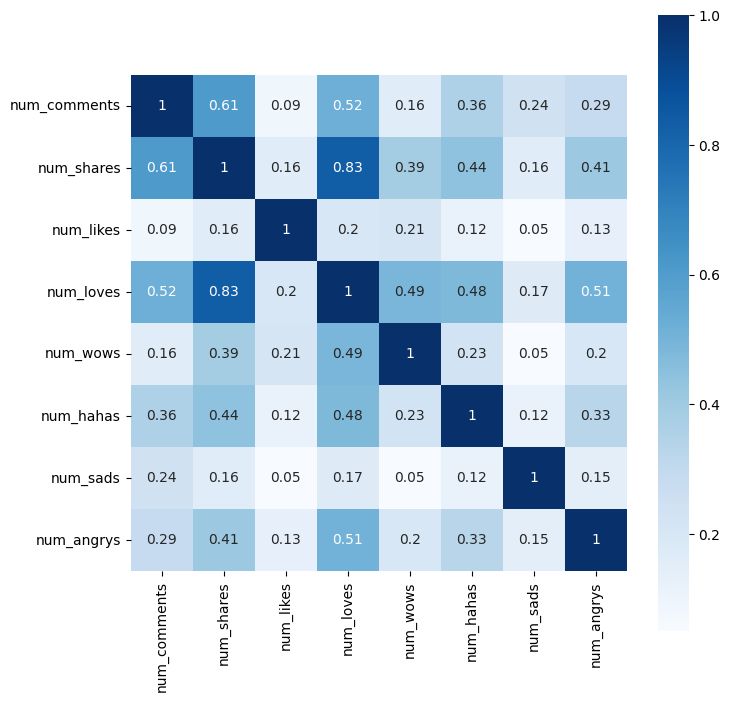

In [691]:
# setting plot size
fig, ax = plt.subplots(figsize = (8, 8))


# developing a correlation matrix object
df_corr = metrics_scaled.corr(method = 'pearson').round(decimals = 2)


# # creating a correlation heatmap
sns.heatmap(data   = df_corr,
            cmap   = 'Blues',
            square = True,
            annot  = True)


# rendering the heatmap
plt.show()

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
Based on the correlation matrix, absolute values above 0.50 are comparatively rare where most variables have relatively low Pearson correlation coefficients among themselves. This implies that the dataset might be a good fit for Principal Component Analysis (PCA) because it includes a variety of independent data. A significant amount of the variance may be explained by a small number of principal components in PCA, allowing for dimensionality reduction without significantly sacrificing information.
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<h1>Part IV  - Principal Component Analysis</h1>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

**a) Develop a PCA object with no limit to principal components and analyze its scree plot.**

In [692]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 702)


# FITTING and TRANSFORMING the scaled data
df_pca = pca.fit_transform(metrics_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", metrics_scaled.shape)
print("PCA shape     :", df_pca.shape)

Original shape: (2297, 8)
PCA shape     : (2297, 8)


**print out each explained variance ratio.**

In [693]:
# component number counter
component_number = 0


# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.412
PC 2: 0.133
PC 3: 0.116
PC 4: 0.097
PC 5: 0.091
PC 6: 0.082
PC 7: 0.049
PC 8: 0.019


In [694]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum(axis = 0))

1.0


**b) Develop PCA and scree plot**

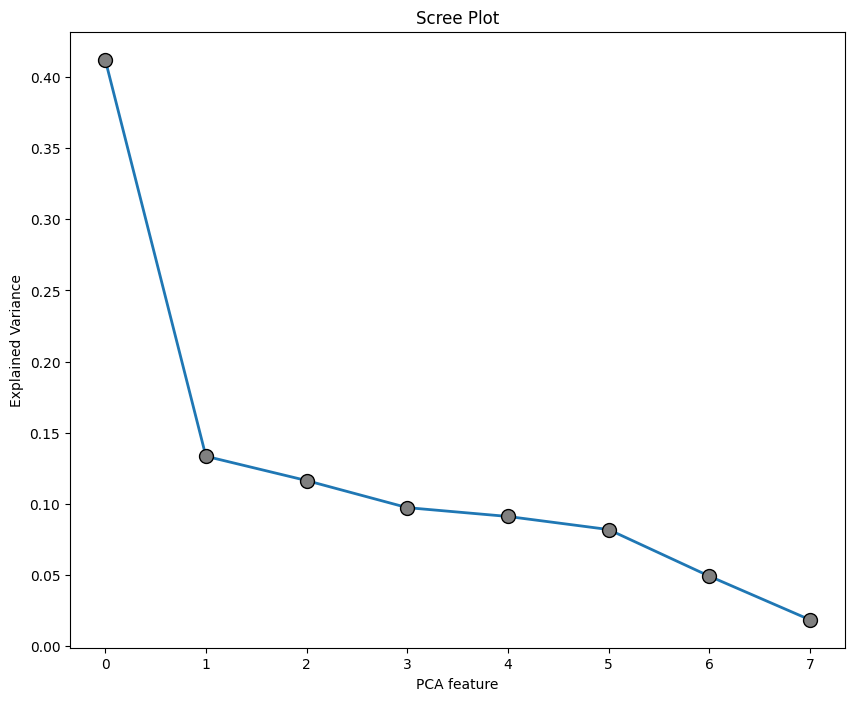

In [726]:
# # # calling the scree_plot function
scree_plot(pca_object = pca)
# calling the scree_plot function
#scree_plot(pca_object=pca, cut_off_line=4)

**Plotting the scree plot with a cutoff line**

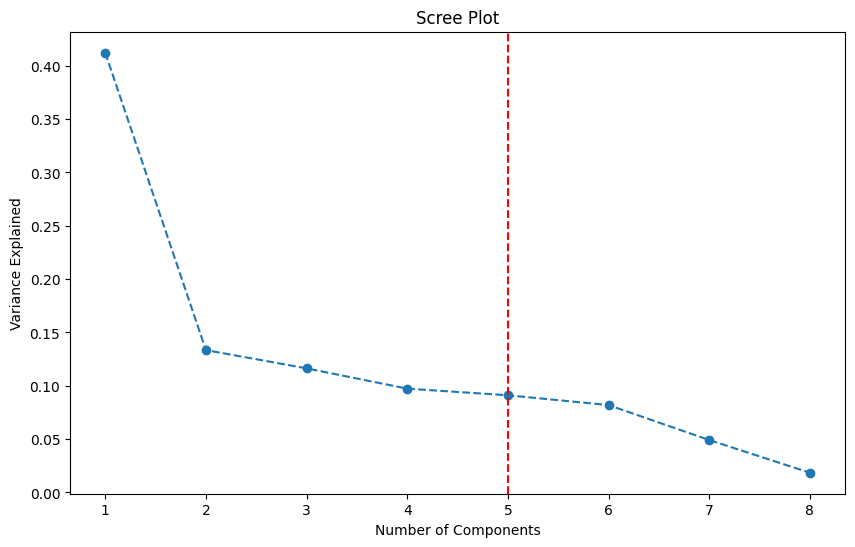

In [724]:
# Plotting the scree plot with a cutoff line
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.axvline(x=5, color='r', linestyle='--')  # Cutoff at 3 components based on observation
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_) + 1, 1))
plt.show()


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**Selecting first 5 pca for analysis**

- **Elbow Method** : The scree plot visually supports this decision. There's a noticeable elbow around the fifth component, after which the variance explained by each subsequent component drops more slowly and levels off. This indicates that additional components beyond the fifth would contribute less to the explanation of data variability.

- **Cumulative Variance:** A common rule of thumb is to retain enough components to explain at least 80% of the variance in a dataset.. Since the first five components exceed this threshold, you're within a commonly accepted range for the amount of variance to capture in PCA. The first principal component accounts for substantially more variance than the others, with just over 41% of the total variance.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**c) Run PCA again, limiting the number of components based on the scree plot.**


In [697]:
# INSTANTIATING a new model using the first three principal components
pca_5 = PCA(n_components = 5,
            random_state = 702)


# FITTING and TRANSFORMING the metrics_scaled
df_pca_5 = pca_5.fit_transform(metrics_scaled )

**d) Present the factor loadings for the retained principal components**

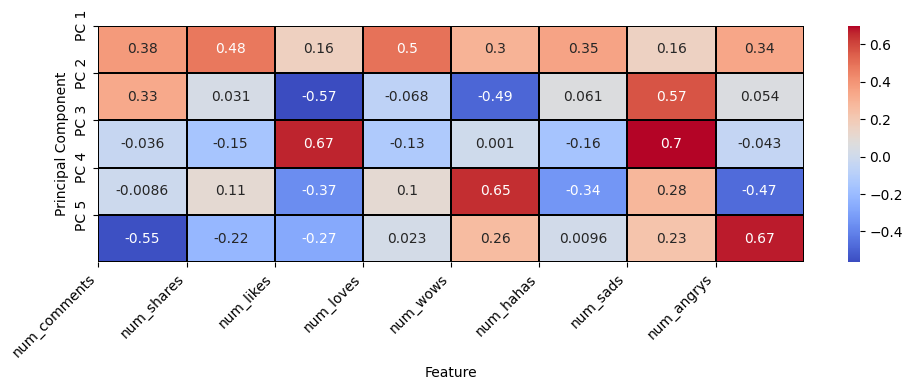

In [698]:
# setting plot size
fig, ax = plt.subplots(figsize=(10, 4))  # Adjust width and height as needed

# developing a PC to feature heatmap
sns.heatmap(pca_5.components_, 
            cmap = 'coolwarm',
            annot = True,
            linewidths = 0.1,
            linecolor = 'black')

# setting more plot options
plt.yticks([0, 1, 2,3,4], ["PC 1", "PC 2", "PC 3","PC 4", "PC 5"], va='center')  # Adjust for vertical alignment
plt.xticks(range(0, metrics_scaled.shape[1]),  
           metrics_scaled.columns, 
           rotation=45,  # Adjust rotation for better fit
           ha='right')  # Adjust horizontal alignment as needed

plt.xlabel("Feature")
plt.ylabel("Principal Component")

plt.tight_layout()  # Adjust layout for better fit and to prevent overlap
# displaying the plot
plt.show()


In [699]:
####################
### Max PC Model ###
####################
# transposing pca components (pc = MAX)
factor_loadings = pd.DataFrame(np.transpose(pca.components_))


# naming rows as original features
factor_loadings = factor_loadings.set_index(metrics_scaled.columns)


##################
### 3 PC Model ###
##################
# transposing pca components (pc = 3)
factor_loadings_5 = pd.DataFrame(np.transpose(pca_5.components_))


# naming rows as original features
factor_loadings_5 = factor_loadings_3.set_index(metrics_scaled.columns)


# checking the results
print(f"""
MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}


5 Components Factor Loadings
------------------------------
{factor_loadings_5.round(2)}
""")


MAX Components Factor Loadings
------------------------------
                 0     1     2     3     4     5     6     7
num_comments  0.38  0.33 -0.04 -0.01 -0.55 -0.21  0.62  0.10
num_shares    0.48  0.03 -0.15  0.11 -0.22 -0.19 -0.47 -0.65
num_likes     0.16 -0.57  0.67 -0.37 -0.27 -0.05 -0.02 -0.01
num_loves     0.50 -0.07 -0.13  0.10  0.02 -0.13 -0.41  0.73
num_wows      0.30 -0.49  0.00  0.65  0.26  0.14  0.38 -0.11
num_hahas     0.35  0.06 -0.16 -0.34  0.01  0.85  0.04 -0.04
num_sads      0.16  0.57  0.70  0.28  0.23  0.14 -0.10 -0.02
num_angrys    0.34  0.05 -0.04 -0.47  0.67 -0.36  0.25 -0.11


5 Components Factor Loadings
------------------------------
                 0     1     2     3     4
num_comments  0.38  0.33 -0.04 -0.01 -0.55
num_shares    0.48  0.03 -0.15  0.11 -0.22
num_likes     0.16 -0.57  0.67 -0.37 -0.27
num_loves     0.50 -0.07 -0.13  0.10  0.02
num_wows      0.30 -0.49  0.00  0.65  0.26
num_hahas     0.35  0.06 -0.16 -0.34  0.01
num_sads      0.16  0.57 

**e) Rename each principal component.**

In [700]:
# naming each principal component
factor_loadings_5.columns = ["Active Positive Engagement",
                            "Emotional Diversity"    ,
                             "Sympathetic Engagement",
                             "Controversy",
                             "Instinctual Reactions"]


# checking the result
factor_loadings_5.round(decimals = 2)

,Active Positive Engagement,Emotional Diversity,Sympathetic Engagement,Controversy,Instinctual Reactions
num_comments,0.38,0.33,-0.04,-0.01,-0.55
num_shares,0.48,0.03,-0.15,0.11,-0.22
num_likes,0.16,-0.57,0.67,-0.37,-0.27
num_loves,0.50,-0.07,-0.13,0.10,0.02
num_wows,0.30,-0.49,0.00,0.65,0.26
num_hahas,0.35,0.06,-0.16,-0.34,0.01
num_sads,0.16,0.57,0.70,0.28,0.23
num_angrys,0.34,0.05,-0.04,-0.47,0.67


In [701]:
# analyzing factor strengths per metric 
factor_loadings1 = pca_5.transform(metrics_scaled)


# converting to a DataFrame
factor_loadings_df1 = pd.DataFrame(factor_loadings1)


# renaming columns
factor_loadings_df1.columns = factor_loadings_5.columns


# checking the results
factor_loadings_df1.head(n = 5)

,Active Positive Engagement,Emotional Diversity,Sympathetic Engagement,Controversy,Instinctual Reactions
0,2.149506,-0.041732,0.076829,0.477796,-0.669884
1,-0.509736,-0.101513,-0.017248,-0.005416,0.026406
2,3.269001,-0.340849,-0.342700,-2.116906,3.282380
3,-0.588948,-0.040418,-0.055416,0.010399,0.037315
4,-0.436563,-0.296430,0.008802,0.233194,0.120287


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Analysis Questions 3</h2><br>
Interpret each of your retained principal components. Remember to interpret both sides of each principal component. (minimum 5 sentences per principal component)



<h5>Answer</h5>

**1)Active Positive Engagement (PC1):** This component, with significant positive loadings across all interaction types, seems to capture the overall level of user engagement with the content. The positive association with 'num_comments', 'num_shares', 'num_likes', etc., suggests that high scores on this component are characteristic of posts that have widely engaging content, likely to generate conversations and sharing among users. Negative contributions are minimal, underscoring its character as a measure of positive engagement. This is the component where most features contribute equally, suggesting that when users engage, they tend to do so across multiple interaction types.

**2)Emotional Diversity (PC2):** This component contrasts the sentiment of reactions, with high negative loadings for 'num_likes' and positive for 'num_sads'. It captures the divergence in user sentiment, differentiating content that evokes positive emotions from that which elicits sadness. A high score on this component might indicate content that is more somber or serious in nature, triggering a sad reaction, while a low score would be associated with content that is more universally liked and perhaps less emotionally complex.

**3)Sympathetic Engagement (PC3):** Dominated by 'num_likes' and 'num_sads', this component seems to reflect a spectrum of sympathetic engagement, capturing the capacity of content to elicit a strong emotional response, whether of joy or sorrow. Posts scoring high on this component may be those that deeply resonate with users, prompting them to express their emotions through likes or sad reactions. It could represent content that is emotionally charged, be it positively or negatively.

**4)Controversy (PC4):** With the highest loading for 'num_wows', this component might capture content that surprises or shocks, which could be polarizing or controversial. Posts with high values on this component are likely those that attract attention and might be unexpected or startling, as indicated by a significant number of 'wow' reactions. The negative loading for 'num_hahas' suggests a divergence from content that is simply humorous or entertaining.

**5)"Instinctual Reactions(PC5):** the principal component is characterized by a high positive loading for 'num_angrys', indicating that it significantly correlates with content that evokes anger. Conversely, the negative loadings for 'num_comments' and 'num_likes' suggest that this component is inversely related to content that promotes engagement through conversation (comments) or positive reactions (likes).
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h1>Part V: K-means clustering</h1><br>
<br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

In [702]:
# checking variance amongst clusters
np.var(factor_loadings_df1)

C:\Users\racha\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Active Positive Engagement    3.297265
Emotional Diversity           1.067377
Sympathetic Engagement        0.930816
Controversy                   0.778575
Instinctual Reactions         0.728917
dtype: float64

**a) Complete the code to prepare a scaled version of the factor loadings dataset.¶**

In [703]:
# applying the unsupervised_scaler function
pca_rescaled = scaler(df = factor_loadings_df1)


# checking pre- and post-scaling variance
print(np.var(factor_loadings_df1), '\n\n')
print(np.var(pca_rescaled))

Active Positive Engagement    3.297265
Emotional Diversity           1.067377
Sympathetic Engagement        0.930816
Controversy                   0.778575
Instinctual Reactions         0.728917
dtype: float64 


Active Positive Engagement    1.0
Emotional Diversity           1.0
Sympathetic Engagement        1.0
Controversy                   1.0
Instinctual Reactions         1.0
dtype: float64


C:\Users\racha\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3785: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Agglomerative Clustering</h2><br>

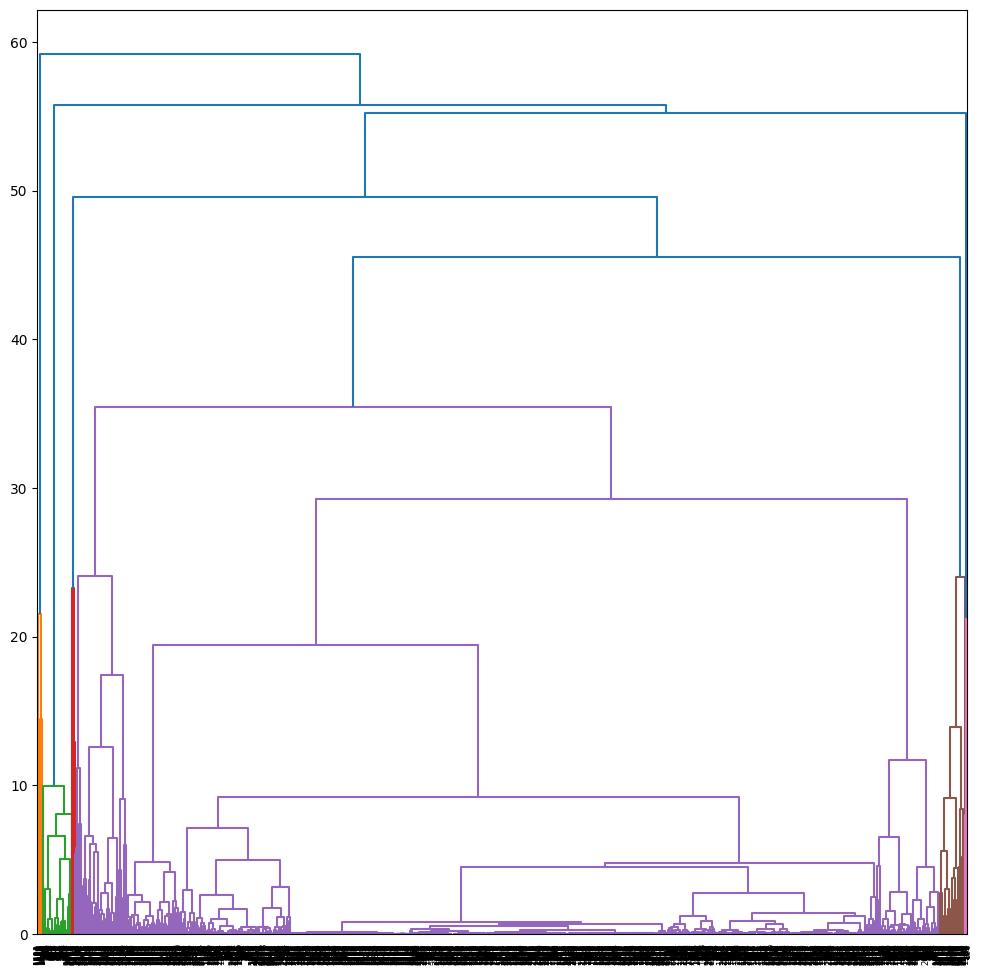

In [704]:
# grouping data based on Ward distance

standard_mergings_ward = linkage(y = pca_rescaled,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation  = 90       ,
           leaf_font_size = 6        )


# rendering the plot
plt.show()


<h2>Develop k-means clustering</h2><br>

**a) k-Means object with clusters**

In [705]:
# INSTANTIATING a k-Means object with clusters
df_k_pca = KMeans(n_clusters   = 5 ,
                         n_init       = 'auto',
                         random_state = 702   )


# fitting the object to the data
df_k_pca.fit(pca_rescaled)


# converting the clusters to a DataFrame
df_kmeans_pca = pd.DataFrame({'Cluster': df_k_pca.labels_})


# checking the results
print(df_kmeans_pca.iloc[: , 0].value_counts())

Cluster
2    2010
0     213
3      46
1      22
4       6
Name: count, dtype: int64


**b) Rename each principal component and display the centroids (mean values) for each cluster**

In [706]:
# storing cluster centers
centroids_pca = df_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca).round(decimals = 2)


# renaming principal components
centroids_pca_df.columns = ["Active Positive Engagement",
                            "Emotional Complexity"    ,
                             "Sympathetic Engagement", 
                              "Controversy",
                              "Instinctual Reactions"]


# checking results (clusters = rows, pc = columns)
centroids_pca_df

,Active Positive Engagement,Emotional Complexity,Sympathetic Engagement,Controversy,Instinctual Reactions
0,1.35,0.23,-0.46,0.03,-0.27
1,5.29,-1.38,-0.76,-2.49,5.23
2,-0.28,-0.08,0.03,0.01,0.03
3,3.28,2.01,-0.23,0.06,-3.24
4,1.90,8.92,11.58,4.46,4.05


**c) concatenating cluster memberships with principal components**

In [707]:
# concatenating cluster memberships with principal components
clst_pca_df = pd.concat([df_kmeans_pca,
                         factor_loadings_df],
                         axis = 1)




# concatenating demographic information with pca-clusters
final_df = pd.concat([df.loc[ : , ['status_id','status_type','time_published',
                           'month' ,'year', 'hour','day','is_video' ]],
                      clst_pca_df.round(decimals = 2)],
                      axis = 1)


# renaming cluster
final_df.columns = ['status_id','status_type','time_published',
                 'month' ,'year', 'hour','day','is_video','Cluster' ,
                   "Balanced Engagers","Reaction Provokers","Quiet Observers","Emotionally Charged","Highly Engaging" ]


# checking the results
final_df.head(n = 5)

,status_id,status_type,time_published,month,year,hour,day,is_video,Cluster,Balanced Engagers,Reaction Provokers,Quiet Observers,Emotionally Charged,Highly Engaging
0,1,video,2018-04-22 06:00:00,4,2018,6,22,1,0,2.15,-0.04,0.08,0.48,-0.67
1,2,photo,2018-04-18 03:22:00,4,2018,3,18,0,2,-0.51,-0.10,-0.02,-0.01,0.03
2,3,video,2018-04-18 00:24:00,4,2018,0,18,1,1,3.27,-0.34,-0.34,-2.12,3.28
3,4,photo,2018-04-11 04:53:00,4,2018,4,11,0,2,-0.59,-0.04,-0.06,0.01,0.04
4,5,photo,2018-04-09 02:06:00,4,2018,2,9,0,2,-0.44,-0.30,0.01,0.23,0.12


**d) labels to categorical variables.**

In [708]:
# renaming column 
video_status = {1 : 'video',
                0 : 'not_video'}


final_df['is_video'].replace(video_status, inplace = True)

# renaming cluster 
cluster_names = {0 : '1',
                 1 : '2',
                 2 : '3',
                 3:  '4',
                 4:  '5'}


final_df['Cluster'].replace(cluster_names, inplace = True)


# checking results
final_df.head(n = 5)

,status_id,status_type,time_published,month,year,hour,day,is_video,Cluster,Balanced Engagers,Reaction Provokers,Quiet Observers,Emotionally Charged,Highly Engaging
0,1,video,2018-04-22 06:00:00,4,2018,6,22,video,1,2.15,-0.04,0.08,0.48,-0.67
1,2,photo,2018-04-18 03:22:00,4,2018,3,18,not_video,3,-0.51,-0.10,-0.02,-0.01,0.03
2,3,video,2018-04-18 00:24:00,4,2018,0,18,video,2,3.27,-0.34,-0.34,-2.12,3.28
3,4,photo,2018-04-11 04:53:00,4,2018,4,11,not_video,3,-0.59,-0.04,-0.06,0.01,0.04
4,5,photo,2018-04-09 02:06:00,4,2018,2,9,not_video,3,-0.44,-0.30,0.01,0.23,0.12


In [709]:
# dynamic string with value counts for each demographic (cluster 1)
print(f"""\
 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "Cluster"][final_df.loc[ : , "Cluster"] == '1']) /
       len(final_df), ndigits = 2)}


is_video
-------
{final_df.loc[ : , "is_video"][ final_df.loc[ : , 'Cluster' ] == '1']

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  
  

""")

 -----------
| Cluster 1 |
 -----------

Proportion of Observations
--------------------------
0.09


is_video
-------
is_video
not_video    0.03
video        0.97
  
  




In [710]:
# dynamic string with value counts for each demographic (cluster 1)
print(f"""\
 -----------
| Cluster 2 |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "Cluster"][final_df.loc[ : , "Cluster"] == '2']) /
       len(final_df), ndigits = 2)}

is_video
-------
{final_df.loc[ : , "is_video"][ final_df.loc[ : , 'Cluster' ] == '2']

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  
  

""")

 -----------
| Cluster 2 |
 -----------

Proportion of Observations
--------------------------
0.01

is_video
-------
is_video
not_video    0.18
video        0.82
  
  




In [711]:
# dynamic string with value counts for each demographic (cluster 1)
print(f"""\
 -----------
| Cluster 3 |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "Cluster"][final_df.loc[ : , "Cluster"] == '3']) /
       len(final_df), ndigits = 2)}

is_video
-------
{final_df.loc[ : , "is_video"][ final_df.loc[ : , 'Cluster' ] == '3']

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  
""")

 -----------
| Cluster 3 |
 -----------

Proportion of Observations
--------------------------
0.88

is_video
-------
is_video
not_video    0.75
video        0.25
  



In [712]:
# dynamic string with value counts for each demographic (cluster 1)
print(f"""\
 -----------
| Cluster 4 |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "Cluster"][final_df.loc[ : , "Cluster"] == '4']) /
       len(final_df), ndigits = 2)}

is_video
-------
{final_df.loc[ : , "is_video"][ final_df.loc[ : , 'Cluster' ] == '4']

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}

""")

 -----------
| Cluster 4 |
 -----------

Proportion of Observations
--------------------------
0.02

is_video
-------
is_video
video    1.0




In [713]:
# dynamic string with value counts for each demographic (cluster 1)
print(f"""\
 -----------
| Cluster 5 |
 -----------

Proportion of Observations
--------------------------
{round(len(final_df.loc[ : , "Cluster"][final_df.loc[ : , "Cluster"] == '5']) /
       len(final_df), ndigits = 2)}


is_video
-------
{final_df.loc[ : , "is_video"][ final_df.loc[ : , 'Cluster' ] == '5']

         .value_counts(normalize = True)
         .round(decimals = 2)
         .sort_index().to_string(dtype = False, name = False)}
  """)

 -----------
| Cluster 5 |
 -----------

Proportion of Observations
--------------------------
0.0


is_video
-------
is_video
not_video    0.67
video        0.33
  


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Analysis Questions 4</h2><br>

1. Decide on an ideal number of clusters and explain your rationale. (minimum 5 sentences)

<h5>Answer</h5>

- **Scree Plot Analysis:** The scree plot suggests that the first 5 components explain a substantial amount of the variance, with a noticeable elbow after the 5th component. This could be an indication that 5 clusters would be appropriate.

- **Dendrogram Analysis:** The dendrogram supports the possibility of four or five clusters based on the large jumps in merge distances. The significant increase in distance after the fourth and fifth merges suggests natural groupings in the data.

- **Variance Explanation:** Ideally, the retained clusters should explain a high percentage of the variance in the data. In this case, the first five principal components explain the majority of the variance, which may align well with the 5 clusters.

- Choosing five clusters is backed up by model results, which show improved performance with five clusters compared to four. This suggests that the fifth cluster adds valuable differentiation between data points that might otherwise be grouped too broadly.

- In essence, five clusters align with the analysis from both the scree plot and dendrogram, reinforcing a cohesive structure within the data. This choice supports a detailed yet manageable segmentation, providing actionable insights for marketing strategies that are well-defined and targeted.


2. Present and interpret each segment using cluster centroids and give an example of a "normal" post in each segment. (minimum 5 sentences per segment)

<h5>Answer</h5>

-  **Cluster 1 - "Balanced Engagers"**. With moderate centroid values, this section is likely to contain postings with a balanced amount of involvement and no extreme reactions. They are neither hugely contentious or overtly emotive, yet they maintain a consistent level of positive involvement. A example post may be a conventional advertising video with moderate likes and shares, indicating broad satisfaction but no significant emotions.
   A routine update on a new clothing item, with some likes and comments but no major controversy or emotional reactions.
   
-  **Cluster 2 - "Reaction Provokers"**: This section has the highest centroid value for "Instinctual Reactions" and negative values for "Emotional Complexity" and "Sympathetic Engagement", indicating that these postings evoke strong, instant reactions such as wrath or astonishment. They may be contentious or conflicting .
  Example : A video post with a strong statement or surprising material that elicits a large number of "angry" or "wow" responses.

- **Cluster 3 - "Quiet Observers"**: Posts in this section tend to receive relatively little involvement overall, as seen by the low centroid values for all components. These posts are likely to go undetected or receive little response from viewers.
   Example : A simple informational text post that does not generate much conversation, sharing, or emotional response.
   
- **Cluster 4 - "Emotionally Charged"**. With high scores for "Emotional Complexity" and "Sympathetic Engagement", postings in this cluster are likely to elicit sympathetic and diverse emotional reactions from the audience. These might be postings with emotionally charged material, such as those about charities or social causes.
  Example: A emotional video about a community project that generates a lot of "love" replies and sparks conversations in the comments.

- **Cluster 5 - "Highly Engaging"**: The centroid values correspond to postings that are extremely engaging and generate significant positive and diverse emotional responses. They may be fascinating or engaging, resulting in high levels of involvement.
  Example: A viral video challenge tied to a popular trend that obtains extensive "likes", "loves", and shares, potentially accompanied by various emotional responses such as "haha" or "wow".


3. Analyze the status types of each segment and report any findings related to videos. (minimum 5)

<h5>Answer</h5>

- **Cluster 1.** This segment has a high preference for video content, with 97% being videos. It appears to attract a user  base that is  actively engaged with video content, implying that such content is compelling and possibly well-targeted for its intended audience.
  
- **Cluster 2.** Videos account for 82% of the dataset, despite their smaller proportion. This suggests that video content that is potentially controversial or thought-provoking tends to generate engagement, potentially eliciting reactions and discussions from users.

- **Cluster 3.** This cluster may include less interactive posts or even static images, as 75% of users do not interact with video content. Within this group, which may prefer other types of content or be less inclined to interact, video content does not appear to perform as well.

- **Cluster 4.** It's interesting to note that this cluster has 100% video engagement, suggesting that emotionally charged video content works very well with this particular audience. It implies that people are more likely to be completely engaged when videos appeal to their emotions.

- **Cluster 5.** Non-video content makes up two thirds of this segment's content. It seems that a variety of extremely engaging content types that don't rely exclusively on videos may be the main source of engagement in this case, or videos may not even be the main driver.




<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h1>Part VI: Develop three logistic regression models</h1><br>

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Model 1: Original x-features</h3><br>

In [714]:

#from sklearn.preprocessing import StandardScaler
#?# Do we get better results when we scale the factor loadings? #?#
df_pca_scaled = standard_scaler(df = pd.DataFrame(data = metrics_scaled ))


# selecting x- and y-data
x_data = metrics_scaled 
y_data = df['is_video']


# training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 702,
                                                    stratify     = y_data)



In [715]:
import sklearn.linear_model                                 # classification modeling

# INSTANTIATING a logistic regression model
model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                C            = 1,
                                                class_weight ="balanced",
                                                random_state = 702)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model_fit.predict(x_test) # predict_proba for multiclass


# checking results
train_acc = model_fit.score(x_train, y_train)
test_acc  = model_fit.score(x_test , y_test )
roc_score = roc_auc_score  (y_true      = y_test,
                            y_score     = model_pred)


print(f"""
Train-Test Gap: {abs(train_acc - test_acc).round(decimals = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.016
Test AUC Score: 0.72



In [716]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 362
False Positives: 18
False Negatives: 100
True Positives : 95



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Model 1: Original x-features

Train-Test Gap: The gap between train and test accuracy is 0.016, indicating the model is not overfitting and generalizes well.

Test AUC Score: An AUC of 0.72 suggests the model has good discriminative ability between the classes.

Confusion Matrix: With 362 true negatives and 95 true positives, the model correctly identifies most of the non-video and video posts. However, there are 18 false positives and 100 false negatives. False positives may lead to misclassifying a non-video as a video, which could be a minor issue. False negatives are more problematic as they involve missing out on video content, which is crucial if the model is used to identify video content for marketing strategies.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Model 2: Retained principal components</h3><br>

In [717]:
#from sklearn.preprocessing import StandardScaler
#?# Do we get better results when we scale the factor loadings? #?#
df_pca_scaled = standard_scaler(df = pd.DataFrame(data = df_pca_5))


# selecting x- and y-data
x_pca_data = df_pca_5
y_pca_data = df['is_video']

# training and testing sets
x_pca_train, x_pca_test, y_pca_train, y_pca_test = train_test_split(x_pca_data,
                                                                    y_pca_data,
                                                                    test_size    = 0.25,
                                                                    random_state = 702,
                                                                    stratify     = y_data)

In [718]:
# INSTANTIATING a logistic regression model
pca_model = sklearn.linear_model.LogisticRegression(solver       = 'lbfgs',
                                                    C            = 1,
                                                    class_weight="balanced",
                                                    random_state = 702)


# FITTING the training data
pca_model_fit = pca_model.fit(x_pca_train, y_pca_train)


# PREDICTING based on the testing set
pca_model_pred = pca_model_fit.predict(x_pca_test) # predict_proba for multiclass


# Checking results
train_acc = pca_model_fit.score(x_pca_train, y_pca_train)
test_acc  = pca_model_fit.score(x_pca_test, y_pca_test)
roc_score = roc_auc_score(y_true=y_pca_test, y_score=pca_model_pred)

print(f"""
Train-Test Gap: {abs(train_acc - test_acc).round(decimals=3)}
Test AUC Score: {roc_score.round(decimals=3)}
""")



Train-Test Gap: 0.021
Test AUC Score: 0.708



In [719]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_test, y_pred = pca_model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 359
False Positives: 21
False Negatives: 103
True Positives : 92



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Model 2: Retained principal components
Train-Test Gap: Slightly higher at 0.021, yet still indicative of good generalization.

Test AUC Score: A slightly lower AUC of 0.708, but still indicates a good model.

Confusion Matrix: This model has 359 true negatives and 92 true positives. The false positives have increased to 21, and false negatives to 103. The increase in false negatives is concerning for reasons similar to Model 1.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Model 3: Retained clusters</h3><br>

In [720]:
# factorizing cluster results 
cluster_df = pd.get_dummies(data       = df_kmeans_pca['Cluster'],
                            drop_first = True).astype(dtype = int)


# checking results
cluster_df.value_counts(normalize = False).sort_index(ascending = False)

1  2  3  4
1  0  0  0      22
0  1  0  0    2010
   0  1  0      46
      0  1       6
         0     213
Name: count, dtype: int64

In [721]:
# selecting x- and y-data
x_cluster_data = cluster_df
y_cluster_data = df['is_video']


# training and testing sets
x_cluster_train, x_cluster_test, y_cluster_train, y_cluster_test = train_test_split(x_cluster_data,
                                                                                    y_cluster_data,
                                                                                    test_size    = 0.25,
                                                                                    random_state = 702,
                                                                                    stratify     = y_data)

In [722]:
# INSTANTIATING a logistic regression model
cluster_model = sklearn.linear_model.LogisticRegression(solver = 'lbfgs',
                                                C            = 1,
                                                class_weight ="balanced",
                                                random_state = 702)


# FITTING the training data
cluster_model_fit = cluster_model.fit(x_cluster_train, y_cluster_train)


# PREDICTING based on the testing set
cluster_model_pred = cluster_model_fit.predict(x_cluster_test) # predict_proba for multiclass


# checking results
train_acc = cluster_model_fit.score(x_cluster_train, y_cluster_train)
test_acc  = cluster_model_fit.score(x_cluster_test , y_cluster_test)
roc_score = roc_auc_score  (y_true  = y_cluster_test,
                            y_score = cluster_model_pred)


print(f"""
Train-Test Gap: {abs(train_acc - test_acc).round(decimals = 3)}
Test AUC Score: {roc_score.round(decimals = 3)}
""")


Train-Test Gap: 0.004
Test AUC Score: 0.676



In [723]:
# unpacking the confusion matrix
model_tn, \
model_fp, \
model_fn, \
model_tp = confusion_matrix(y_true = y_cluster_test, y_pred = cluster_model_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {model_tn}
False Positives: {model_fp}
False Negatives: {model_fn}
True Positives : {model_tp}
""")


True Negatives : 377
False Positives: 3
False Negatives: 125
True Positives : 70



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Model 3: Retained clusters
Train-Test Gap: Very small at 0.004, showing excellent consistency between training and test performance.

Test AUC Score: The AUC dropped to 0.676, suggesting this model is less effective at discrimination compared to the previous models.

Confusion Matrix: There are 377 true negatives and 70 true positives. The false positives are very low at 3, but the false negatives have significantly increased to 125. This indicates the model is conservative in predicting videos, preferring to predict non-video posts, which could lead to missed opportunities if used for targeting video content.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h2>Analysis Questions 5</h2><br>
Select your best model from above and present the following:

1. Your rationale for why this is the best model. (minimum 5 sentences)
2. Model results: train-test gap based on accuracy and AUC score based on the results of the .predict step
3. Confusion matrix: Explain each error and its risks. (minimum 5 sentences)

**Model 1, which uses the original x-features, appears to be the best performing model.**

Train-Test Gap: 0.016. This indicates consistency in performance from the training data set to the test data set, showing the model's stability.
AUC Score: 0.72. The Area Under the Curve represents the model's ability to classify with a true positive rate higher than the false positive rate. A score of 0.72 is relatively good, showing that the model has a reasonable ability to distinguish between classes.

The confusion matrix for Model 1 shows that it has a reasonable balance between true positives (95) and false negatives (100), as well as between true negatives (362) and false positives (18). This balance is important because it shows that the model is not overly biased towards predicting one class over the other. However, false negatives and false positives both represent errors that could have implications, depending on the business context.
False negatives (predicting a non-video post when it is actually a video) could lead to missed opportunities for engagement if the model is used to prioritize video content. Conversely, false positives (predicting a video when it is not) could result in allocating resources to content that might not perform as expected.

In summary, Model 1 strikes a good balance between accuracy and AUC score, suggesting it has good discriminative ability while maintaining an acceptable level of generalizability. The errors shown in the confusion matrix are relatively balanced, reducing the risk of the model being overly biased towards one class, making it a good choice for practical application. However, careful consideration should be given to the context in which this model will be applied, and the implications of its errors should be evaluated in that light




<hr style="height:.9px;border:none;color:#333;background-color:#333;" />